In [146]:
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import os
from datetime import datetime
from skimage.morphology import skeletonize

"""
Prima di lanciare il codice assicurarsi di aver inserito nella cartella "indata" il file json con il labirinto e il file .tiff dell'immagine che lo rappresenta.
Se non si ha a disposizione un labirinto, tornare sul main e crearne uno prima di lanciare il codice.

N.B: L'immagine che si desidera sovrascrivere deve essere l'ultima caricata in indata
"""
#recupero il percorso corrente del file
current_path = os.getcwd()
#creo un percorso combinando il percorso corrente con la cartella "output"
path = os.path.join(current_path,"../output/")
#utilizzo una list comprehension per creare una lista di file nella cartella specificata che terminano con ".json"
json_files = [f for f in os.listdir(path) if f.endswith('.json')]
print(json_files)

['20-10_marked_1675687273.json', '20-10_marked_1675687844.json', '20-10_marked_1675704962.json', '20-10_marked_1675705658.json', '30-20_marked_1675707917.json', 'labirinto3b_marked_1675707385.json', 'output_1674380132.json', 'output_1674968773.json', 'path_20230206_134140.json', 'path_20230206_191610.json', 'path_20230206_191641.json']


In [147]:
#imposto la variabile "latest_file" come una stringa vuota e la variabile "latest_timestamp" come una data iniziale molto vecchia (1 gennaio 1)
latest_file = ""
latest_timestamp = datetime(1, 1, 1)
#verifico se ci sono file nella directory specificata
if json_files:
    for file in json_files:
        # ottengo la data di modifica del file in formato timestamp
        timestamp = os.path.getmtime(os.path.join(path, file))
        # la converto in un oggetto datetime
        timestamp = datetime.fromtimestamp(timestamp)
        # confronto la data di modifica con quella del file più recente 
        if timestamp > latest_timestamp:
            latest_file = file  #se è più recente, la variabile "latest_file" viene impostata come il nome del file corrente 
            latest_timestamp = timestamp    #e la variabile "latest_timestamp" viene impostata come la data di modifica del file corrente.

In [148]:
# apro e manipolo il file più recente
with open(os.path.join(path, latest_file)) as f:
    #leggo i dati del file e li carica in una stringa json.
    json_string = json.load(f)
    data = json.loads(json_string)
#print(data)

In [149]:
#best_path e best_cost inizializzano due variabili rispettivamente come {} e infinito.
best_path = None
best_cost = float('inf')
#Il ciclo for scorre attraverso tutti i valori del dizionario data, che rappresentano percorsi
for percorso in data.values():
    #e controlla se il costo di un determinato percorso è minore di best_cost
    if percorso['cost'] < best_cost:
        #Se è così, assegna quel percorso e il suo costo a best_path e best_cost.
        best_path = percorso
        best_cost = percorso['cost']
#stampo il percorso con il costo minimo
#print(best_path)

In [150]:
path_json = json.dumps(best_path)
#print(path_json)
#genero un nome univoco per il file a seconda dellea data e dell'ora attuali
now = datetime.now()
filename = now.strftime("../output/path_%Y%m%d_%H%M%S.json")

#creo il file JSON (scrivo il contenuto di "path_json" in un file json con nome "filename".
with open(filename, 'w') as f:
    #e il contenuto viene scritto utilizzando il metodo "dump" di json
    json.dump(path_json, f)
#print(filename)
#print(path_json)


In [151]:
path_json = json.loads(path_json)
start = tuple(map(int, path_json["start"]))
goal = tuple(map(int, path_json["goal"]))
path_visited = path_json["pathVisited"]
for x, y in path_visited:
    if (x, y) == start:
        start_x, start_y = x, y
    elif (x, y) == goal:
        goal_x, goal_y = x, y

print(start)
print(goal)

(0, 29)
(21, 31)


In [152]:
x0,y0 = start
y0,x0 = x0,y0
x1,y1 = goal
y1,x1 = x1,y1
print(x0,y0)
print(x1,y1)
start = x0,y0
goal = x1,y1
print(start)
print(goal)


29 0
31 21
(29, 0)
(31, 21)


In [153]:
#print(path_visited)
new_path_visited = [(y, x) for x, y in path_visited]            #in più
#print (new_path_visited)

In [154]:
#recupero il percorso corrente del file
current_path = os.getcwd()
#creo un percorso combinando il percorso corrente con la cartella "indata"
img_files = os.path.join(current_path,"../img_input/")
#utilizzo una list comprehension per creare una lista di file nella cartella specificata che terminano con ".tiff"
img = [f for f in os.listdir(img_files) if f.endswith('.tiff')]
print(img)

['30-20_marked.tiff']


In [155]:
#imposto la variabile "latest_file" come una stringa vuota e la variabile "latest_timestamp" come una data iniziale molto vecchia (1 gennaio 1)
latest_file = ""
latest_timestamp = datetime(1, 1, 1)
#verifico se ci sono file nella directory specificata
if img:
    for file in img:
        # ottengo la data di modifica del file in formato timestamp
        timestamp = os.path.getmtime(os.path.join(img_files, file))
        # la converto in un oggetto datetime
        timestamp = datetime.fromtimestamp(timestamp)
        # confronto la data di modifica con quella del file più recente 
        if timestamp > latest_timestamp:
            latest_file = file  #se è più recente, la variabile "latest_file" viene impostata come il nome del file corrente 
            latest_timestamp = timestamp    #e la variabile "latest_timestamp" viene impostata come la data di modifica del file corrente.

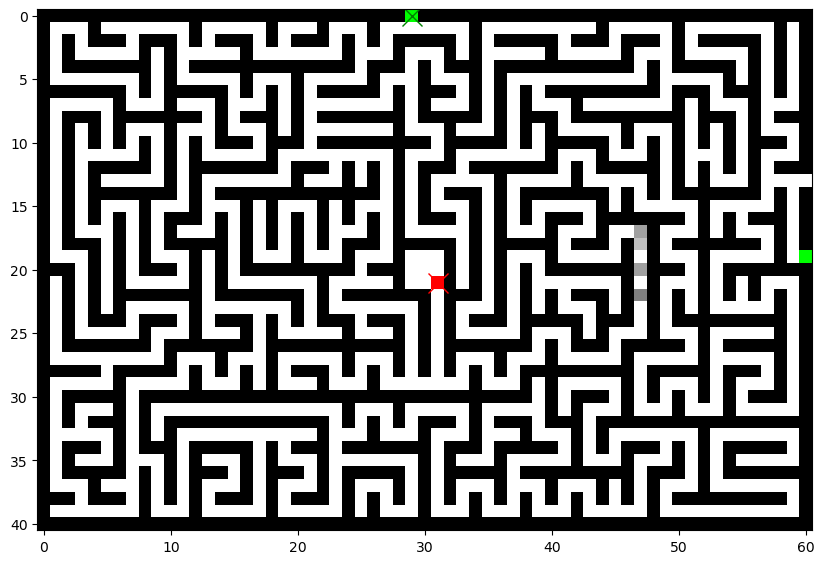

In [156]:
img = os.path.join(img_files, latest_file)
rgb_img = plt.imread(img)
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)

plt.plot(x0,y0, 'gx', markersize = 14)
plt.plot(x1,y1, 'rx', markersize = 14)


In [24]:
#img_name = '../indata/labirinto2_marked.tiff'
#rgb_img = plt.imread(img_name)
#
#plt.figure(figsize=(10,10))
#plt.imshow(rgb_img)
#
#plt.plot(x0,y0, 'gx', markersize = 14)
#plt.plot(x1,y1, 'rx', markersize = 14)


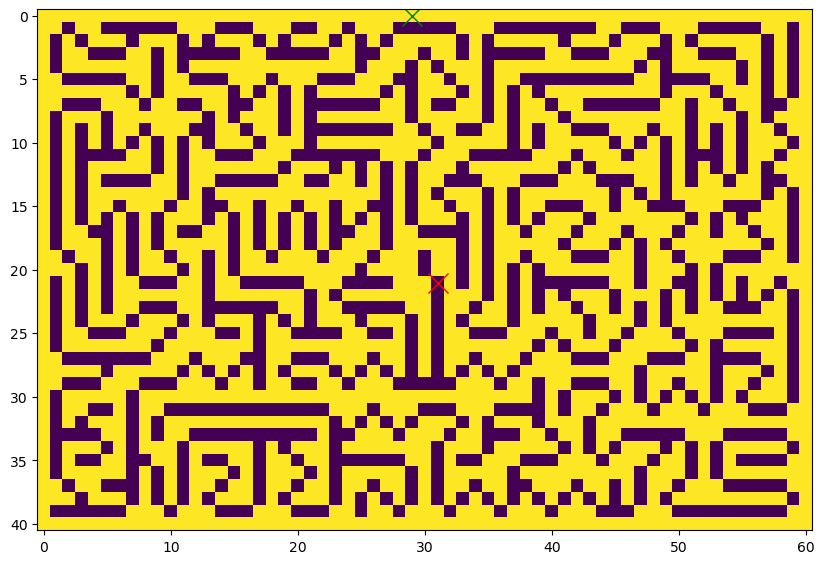

In [157]:
thr_img = rgb_img[:,:,0] > 128
skeleton = skeletonize(thr_img)
plt.figure(figsize=(10,10))
plt.imshow(skeleton)
#map of routes
mapT = ~skeleton
plt.imshow(mapT)
plt.plot(x0,y0, 'gx', markersize=14)
plt.plot(x1,y1, 'rx', markersize=14)
#plt.plot(x2,y2, 'bx', markersize = 14)
#plt.plot(x,y, 'ro')

Optimum route found.


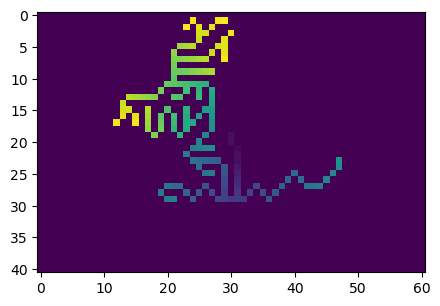

In [158]:
#let'go a temporanery copy of this
_mapt = np.copy(mapT)

#searching to our endpoint and connect to the path
boxr = 2

cpys, cpxs = np.where(_mapt[y1-boxr:y1+boxr, x1-boxr:x1+boxr]==0) #x e y di destinazione


#calibrate points to main scale
cpys += y1-boxr #x e y di destinazione
cpxs += x1-boxr

#find clooset point of possible path endpoints
idx = np.argmin(np.sqrt((cpys-y1)**2 + (cpxs-x1)**2)) #x e y di destinazione
y, x = cpys[idx], cpxs[idx]

pts_x = [x]
pts_y = [y]
pts_c = [0]

#mesh of displacements
xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
ymesh = ymesh.reshape(-1)
xmesh = xmesh.reshape(-1)

dst = np.zeros(thr_img.shape)

#Breath first algorithm exploring a tree
while(True):
    #update distance
    idc = np.argmin(pts_c)
    ct = pts_c.pop(idc)
    x = pts_x.pop(idc)
    y = pts_y.pop(idc)
    #Search 3x3 neighbourhood for possible
    ys, xs = np.where(_mapt[y-1:y+2,x-1:x+2] == 0) #x e y generici diversi da destinazione e arrivo
    #Invalidate these point from future searchers
    _mapt[ys+y-1, xs+x-1] = ct
    _mapt[y,x] = 999999
    #Set the distance in the distance image
    dst[ys+y-1,xs+x-1] = ct + 1
    #
    pts_x.extend(xs+x-1)
    pts_y.extend(ys+y-1)
    pts_c.extend([ct+1]*xs.shape[0])
    #If we run of points
    if pts_x == []:
        break;
    if np.sqrt((x-x0)**2 +(y-y0)**2) < boxr: #x0 prima partenza
        edx = x
        edy = y
        break;

plt.figure(figsize=(5,5))
plt.imshow(dst)

path_x = []
path_y = []

y = edy
x = edx
while(True):
    nbh = dst[y-1:y+2,x-1:x+2]
    nbh[1,1] = 9999999
    nbh[nbh==0] = 9999999
    #if we reach a deadend
    if np.min(nbh) == 9999999:
        break;
    idx = np.argmin(nbh)
    #find direction
    y += ymesh[idx]
    x += xmesh[idx]

    if np.sqrt((x-x1)**2 + (y-y1)**2) < boxr:   #arrivo
        print('Optimum route found.')
        break
    path_y.append(y)
    path_x.append(x)

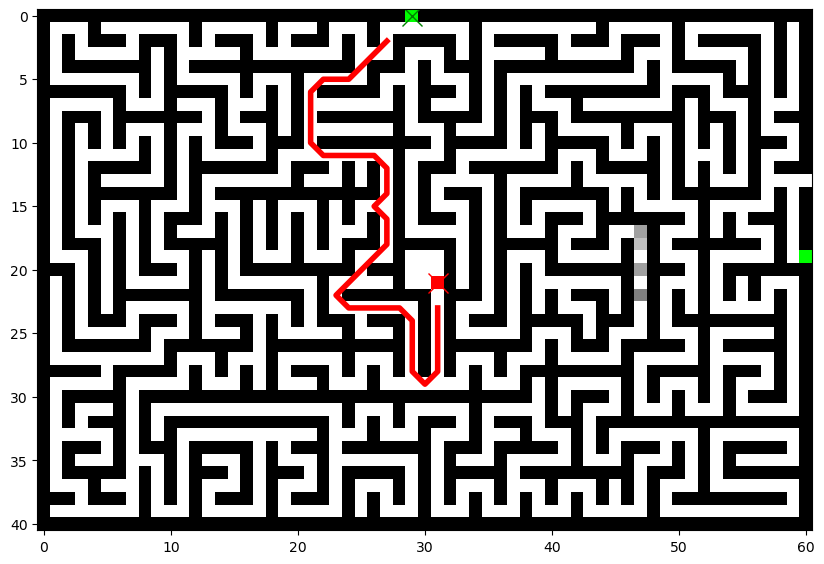

In [159]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)
plt.plot(x0,y0, 'gx', markersize=14)
plt.plot(x1,y1, 'rx', markersize=14)
#plt.plot(x2,y2, 'bx', markersize = 14)
plt.plot(path_x, path_y, 'r-', linewidth=4)
#plt.plot(path_x4, path_y4, 'g-', linewidth=10)

In [47]:
"""
Per trovare solo la lista delle coordinate all'interno del percorso con costo inferiore facciamo questo comando:

#estraggo la chiave "pathVisited" dall'oggetto "best_path" e la assegno alla variabile "path_visited"
path_visited = best_path["pathVisited"]
print(path_visited)

#path_visited la vogliamo trasformare in una lista di tuple dove ogni tupla rappresenta un punto sulla mappa (x, y). 
#Sto convertendo tutti gli elementi della lista path_visited in tuple, in modo che ogni elemento della lista sia una tupla anziché una lista
path_visited = list(map(tuple, path_visited))
print(path_visited)

"""

'\nPer trovare solo la lista delle coordinate all\'interno del percorso con costo inferiore facciamo questo comando:\n\n#estraggo la chiave "pathVisited" dall\'oggetto "best_path" e la assegno alla variabile "path_visited"\npath_visited = best_path["pathVisited"]\nprint(path_visited)\n\n#path_visited la vogliamo trasformare in una lista di tuple dove ogni tupla rappresenta un punto sulla mappa (x, y). \n#Sto convertendo tutti gli elementi della lista path_visited in tuple, in modo che ogni elemento della lista sia una tupla anziché una lista\npath_visited = list(map(tuple, path_visited))\nprint(path_visited)\n\n'

In [160]:
"""
# Caricamento dell'immagine
img = Image.open(img_files, latest_file, 'r')
#img = os.path.join(img_files, latest_file)
pixels = img.load()

# Lettura dei punti dal file JSON
points = []
#with open("punti.json", "r") as f:
    #points = json.load(f)
points = new_path_visited
# Filtrare i punti che passano sui pixel neri
filtered_points = []
for x, y in points:
    if pixels[x, y] != (0, 0, 0):
        filtered_points.append((x, y))

# Salvare i punti filtrati in un nuovo file JSON
with open("punti_filtrati.json", "w") as f:
    json.dump(filtered_points, f)
"""

'\n# Caricamento dell\'immagine\nimg = Image.open(img_files, latest_file, \'r\')\n#img = os.path.join(img_files, latest_file)\npixels = img.load()\n\n# Lettura dei punti dal file JSON\npoints = []\n#with open("punti.json", "r") as f:\n    #points = json.load(f)\npoints = new_path_visited\n# Filtrare i punti che passano sui pixel neri\nfiltered_points = []\nfor x, y in points:\n    if pixels[x, y] != (0, 0, 0):\n        filtered_points.append((x, y))\n\n# Salvare i punti filtrati in un nuovo file JSON\nwith open("punti_filtrati.json", "w") as f:\n    json.dump(filtered_points, f)\n'

In [ ]:
"""
#path_visited = [(y, x) for x, y in path_visited]
#print(path_visited)
import cv2
import numpy as np
import os

# Caricamento immagine
img = os.path.join(img_files, latest_file)
img_cv = cv2.imread(img)

# Creazione immagine di lavoro
mask = np.zeros_like(img_cv)

# Definizione punto iniziale e finale
pts = np.array([[x0, y0], [x1, y1]], dtype=np.int32)

# Riempimento immagine di lavoro
cv2.fillPoly(mask, [pts], (255, 255, 255))

# Applicazione maschera all'immagine
result = cv2.bitwise_and(img_cv, mask)

# Mostrare il risultato
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

Ora da qui in poi facciamo le prove per sovrascrivere il percorso ottimo trovato all'immagine iniziale

In [48]:
"""
Con il seguente comando vediamo tutte le coordinate attraversate dal percorso:

img = os.path.join(img_files, latest_file)
rgb_img = plt.imread(img)
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)

plt.plot(x0,y0, 'gx', markersize = 14)
plt.plot(x1,y1, 'rx', markersize = 14)
#img = plt.imread("../indata/30-20_marked.tiff")
#path_visited = [(y, x) for x, y in path_visited]
#path_json = json.loads(path_json)
#start = tuple(map(int, path_json["start"]))
#goal = tuple(map(int, path_json["goal"]))
#path_visited = path_json["pathVisited"]
#for x, y in path_visited:
#    if (x, y) == start:
#        start_x, start_y = x, y
#    elif (x, y) == goal:
#        goal_x, goal_y = x, y



img = os.path.join(img_files, latest_file)
#img = plt.imread("../indata/30-20_marked.tiff")
height, width, _ = img.shape
path_visited = [(y, x) for x, y in path_visited]
for x, y in path_visited:
    if 0 <= x < width and 0 <= y < height:
        plt.scatter(x, y, c='r', s=4)
        # disegna il punto (x, y) sull'immagine
    else:
        print("Coordinate fuori dalle dimensioni dell'immagine:", x, y)
        # le coordinate non sono valide, quindi non disegna nulla
print(path_visited)
"""

'\nCon il seguente comando vediamo tutte le coordinate attraversate dal percorso:\n\nimg = os.path.join(img_files, latest_file)\nrgb_img = plt.imread(img)\nplt.figure(figsize=(10,10))\nplt.imshow(rgb_img)\n\nplt.plot(x0,y0, \'gx\', markersize = 14)\nplt.plot(x1,y1, \'rx\', markersize = 14)\n#img = plt.imread("../indata/30-20_marked.tiff")\n#path_visited = [(y, x) for x, y in path_visited]\n#path_json = json.loads(path_json)\n#start = tuple(map(int, path_json["start"]))\n#goal = tuple(map(int, path_json["goal"]))\n#path_visited = path_json["pathVisited"]\n#for x, y in path_visited:\n#    if (x, y) == start:\n#        start_x, start_y = x, y\n#    elif (x, y) == goal:\n#        goal_x, goal_y = x, y\n\n\n\nimg = os.path.join(img_files, latest_file)\n#img = plt.imread("../indata/30-20_marked.tiff")\nheight, width, _ = img.shape\npath_visited = [(y, x) for x, y in path_visited]\nfor x, y in path_visited:\n    if 0 <= x < width and 0 <= y < height:\n        plt.scatter(x, y, c=\'r\', s=4)\n

In [49]:
"""
from shapely.geometry import Polygon, LineString

# Caricamento dell'immagine
img = os.path.join(img_files, latest_file)
rgb_img = plt.imread(img)
img_array = np.array(rgb_img)

# Filtro coordinate che rappresentano i muri
filtered_path = []
for x, y in path_visited:
    if img_array[y][x][0] != 0 and img_array[y][x][1] != 0 and img_array[y][x][2] != 0:
        filtered_path.append((x, y))

# creazione linea a partire dalle coordinate
line = LineString(filtered_path)

# simplificazione linea
simplified_line = line.simplify(0.1, preserve_topology=False)

# creazione poligono a partire dalla linea semplificata
polygon = Polygon(list(simplified_line.coords))

# accesso alle coordinate del poligono
simplified_path = list(polygon.exterior.coords)
simplified_path = [(int(x), int(y)) for x, y in simplified_path]
print(x)
## Disegno del percorso sull'immagine
for x, y in simplified_path:
    img_array[y][x] = [255, 0, 0]  # i percorsi sono rappresentati da pixel rossi

# Salvataggio immagine
img = Image.fromarray(img_array)
img.show()
"""

"\nfrom shapely.geometry import Polygon, LineString\n\n# Caricamento dell'immagine\nimg = os.path.join(img_files, latest_file)\nrgb_img = plt.imread(img)\nimg_array = np.array(rgb_img)\n\n# Filtro coordinate che rappresentano i muri\nfiltered_path = []\nfor x, y in path_visited:\n    if img_array[y][x][0] != 0 and img_array[y][x][1] != 0 and img_array[y][x][2] != 0:\n        filtered_path.append((x, y))\n\n# creazione linea a partire dalle coordinate\nline = LineString(filtered_path)\n\n# simplificazione linea\nsimplified_line = line.simplify(0.1, preserve_topology=False)\n\n# creazione poligono a partire dalla linea semplificata\npolygon = Polygon(list(simplified_line.coords))\n\n# accesso alle coordinate del poligono\nsimplified_path = list(polygon.exterior.coords)\nsimplified_path = [(int(x), int(y)) for x, y in simplified_path]\nprint(x)\n## Disegno del percorso sull'immagine\nfor x, y in simplified_path:\n    img_array[y][x] = [255, 0, 0]  # i percorsi sono rappresentati da pixel 

In [50]:
"""
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString


# Caricamento dell'immagine
img = os.path.join(img_files, latest_file)
rgb_img = plt.imread(img)
img_array = np.array(rgb_img)
#path_visited = [(x, y) for y, x in path_visited]
print(path_visited)
# Filtro coordinate che rappresentano i muri
filtered_path = []
for x, y in path_visited:
    if img_array[y][x][0] != 0 and img_array[y][x][1] != 0 and img_array[y][x][2] != 0:
        filtered_path.append((x, y))

#print (filtered_path)


# creazione linea a partire dalle coordinate
line = LineString(path_visited)

# simplificazione linea
simplified_line = line.simplify(0.1, preserve_topology=False)

# creazione poligono a partire dalla linea semplificata
polygon = Polygon(list(simplified_line.coords))

# accesso alle coordinate del poligono
simplified_path = list(polygon.exterior.coords)
simplified_path = [(int(x), int(y)) for x, y in simplified_path]
print (simplified_path)

## Disegno del percorso sull'immagine
for x, y in simplified_path:
    img_array[y][x] = [255, 0, 0]  # i percorsi sono rappresentati da pixel rossi

# Salvataggio immagine
img = Image.fromarray(img_array)
#img.show()
"""

"\nimport numpy as np\nfrom PIL import Image\nimport os\nimport matplotlib.pyplot as plt\nfrom shapely.geometry import Polygon, LineString\n\n\n# Caricamento dell'immagine\nimg = os.path.join(img_files, latest_file)\nrgb_img = plt.imread(img)\nimg_array = np.array(rgb_img)\n#path_visited = [(x, y) for y, x in path_visited]\nprint(path_visited)\n# Filtro coordinate che rappresentano i muri\nfiltered_path = []\nfor x, y in path_visited:\n    if img_array[y][x][0] != 0 and img_array[y][x][1] != 0 and img_array[y][x][2] != 0:\n        filtered_path.append((x, y))\n\n#print (filtered_path)\n\n\n# creazione linea a partire dalle coordinate\nline = LineString(path_visited)\n\n# simplificazione linea\nsimplified_line = line.simplify(0.1, preserve_topology=False)\n\n# creazione poligono a partire dalla linea semplificata\npolygon = Polygon(list(simplified_line.coords))\n\n# accesso alle coordinate del poligono\nsimplified_path = list(polygon.exterior.coords)\nsimplified_path = [(int(x), int(y))

In [51]:
"""
import numpy as np
from PIL import Image
from skimage.draw import line

img = os.path.join(img_files, latest_file)
rgb_img = plt.imread(img)
img_array = np.array(rgb_img)

filtered_path = []
for i in range(1, len(path_visited)):
    x1, y1 = path_visited[i-1]
    x2, y2 = path_visited[i]
    if abs(x2-x1) <= 1 and abs(y2-y1) <= 1:  # le coordinate successive possono differire di 1 solo in una direzione
        if not (img_array[y2][x2] != [0, 0, 0]).all():  # i muri sono rappresentati da pixel neri
            filtered_path.append((x2, y2))
print(filtered_path)
for i in range(1, len(filtered_path)):
    x1, y1 = filtered_path[i-1]
    x2, y2 = filtered_path[i]
    rr, cc = line(y1, x1, y2, x2)  # utilizzo l'algoritmo di Bresenham per tracciare una linea tra i punti consecutivi
    img_array[rr, cc] = [255, 0, 0]

img = Image.fromarray(img_array)
img.show()
"""

"\nimport numpy as np\nfrom PIL import Image\nfrom skimage.draw import line\n\nimg = os.path.join(img_files, latest_file)\nrgb_img = plt.imread(img)\nimg_array = np.array(rgb_img)\n\nfiltered_path = []\nfor i in range(1, len(path_visited)):\n    x1, y1 = path_visited[i-1]\n    x2, y2 = path_visited[i]\n    if abs(x2-x1) <= 1 and abs(y2-y1) <= 1:  # le coordinate successive possono differire di 1 solo in una direzione\n        if not (img_array[y2][x2] != [0, 0, 0]).all():  # i muri sono rappresentati da pixel neri\n            filtered_path.append((x2, y2))\nprint(filtered_path)\nfor i in range(1, len(filtered_path)):\n    x1, y1 = filtered_path[i-1]\n    x2, y2 = filtered_path[i]\n    rr, cc = line(y1, x1, y2, x2)  # utilizzo l'algoritmo di Bresenham per tracciare una linea tra i punti consecutivi\n    img_array[rr, cc] = [255, 0, 0]\n\nimg = Image.fromarray(img_array)\nimg.show()\n"